# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import nltk
import re 
import sys
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential




# Data Collection

In [ ]:
train_data=pd.read_csv('/content/twitter_training.csv', sep=',', names=['Tweet_ID','Entity','Sentiment','Tweet_content'])



# EDA

In [ ]:
train_data.shape

(74682, 4)

In [ ]:
train_data.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
test_data.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,0,mention facebook struggl motiv go run day tran...
1,352,Amazon,2,bbc news amazon boss jeff bezo reject claim co...
2,8312,Microsoft,1,microsoft pay word function poorli samsungu ch...
3,4371,CS-GO,1,csgo matchmak full closet hack truli aw game
4,4433,Google,2,presid slap american face realli commit unlaw ...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
#store the coulmns name in list to use it later easily
coulmns =[]

for col in  train_data.columns:
  coulmns.append(col)

print(coulmns)

['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_content']


In [ ]:
train_data.groupby('Sentiment')[['Tweet_ID']].count()

,Tweet_ID
Sentiment,
Irrelevant,12990
Negative,22542
Neutral,18318
Positive,20832


In [ ]:
train_data['Entity'].value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [ ]:
train_data.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [ ]:
train_data.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

# Data visualization

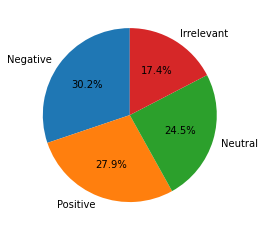

In [ ]:
plt.pie(train_data.Sentiment.value_counts()
,labels=['Negative','Positive','Neutral','Irrelevant'],autopct='%1.1f%%',startangle=90)
plt.show()

In [ ]:
sentiment_groups = train_data.groupby(by="Sentiment")
len(sentiment_groups)

4

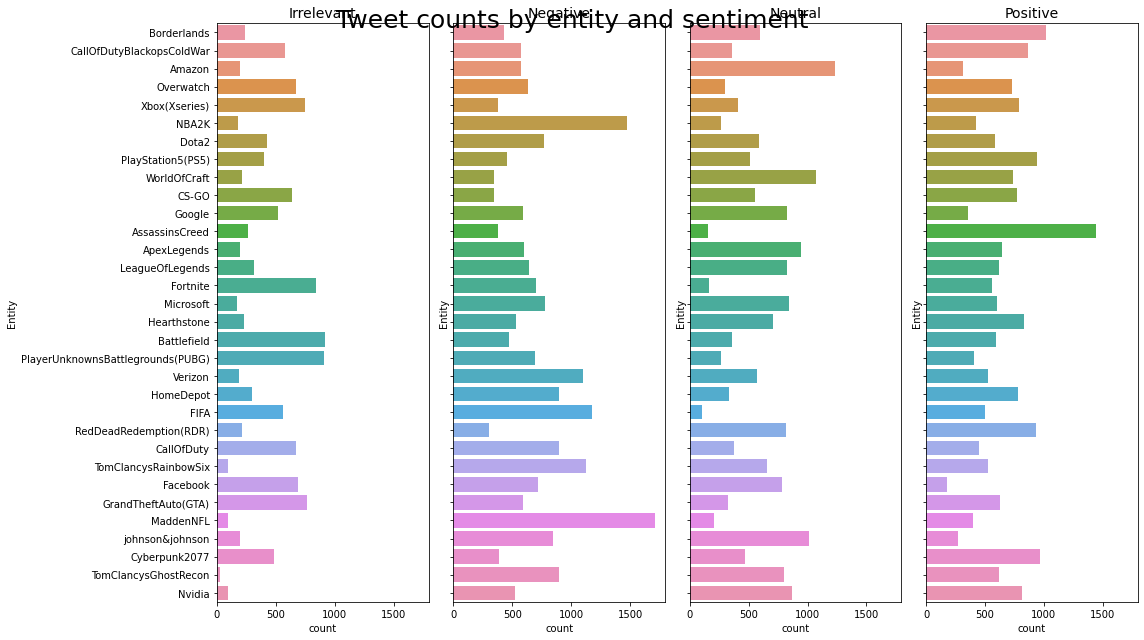

In [ ]:
fig, axs = plt.subplots(ncols = len(sentiment_groups), figsize = (16,9), sharey= True, sharex=True)

loc=0
positive_order = sentiment_groups['Entity'].get_group('Positive').value_counts().index
for group in sentiment_groups.groups.keys():
    sns.countplot(data=sentiment_groups.get_group(group), y='Entity', ax=axs[loc])
                 
    axs[loc].set_title(group, fontsize=14)
    loc += 1       
       
fig.suptitle('Tweet counts by entity and sentiment', fontsize=25)
plt.tight_layout()

# preprocessing

In [ ]:
train_data.duplicated().sum()

2700

In [ ]:
#deop duplicated values
train_data.drop_duplicates(inplace=True )

In [ ]:
#checking  for Nans
train_data.isnull().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    326
dtype: int64

In [ ]:
train_data.isnull().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    326
dtype: int64

In [ ]:
train_data.dropna(inplace=True )

In [ ]:
train_data.isnull().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

In [ ]:
train_data.tail()

,Tweet_ID,Entity,Sentiment,Tweet_content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


**working on the text **

Stemming:

Stemming is the process of reducing a word to its Root 

In [ ]:

port_stem = PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
train_data['Tweet_content'] = train_data['Tweet_content'].apply(stemming)

In [ ]:
le =LabelEncoder()
train_data['Sentiment']=le.fit_transform(train_data['Sentiment'])


In [ ]:
#split the data to x and y
x = train_data['Tweet_content']
y= train_data['Sentiment']

In [ ]:
x.shape

(71656,)

In [ ]:
y.shape

(71656,)

In [ ]:
# converting the textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

x = vectorizer.transform(x)


In [ ]:


x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = .10 ,stratify=y, random_state=1)

In [ ]:
print(x_train.shape,x_test.shape)

(64490, 22361) (7166, 22361)


# Modling >> LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.score(x_train,y_train)

0.8368429213831602

In [ ]:
x_test.shape

(7166, 22361)

In [ ]:
model.score(x_test,y_test)

0.7824448785933575

In [ ]:

y_predicted = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
test_data_accuracy = accuracy_score(y_predicted,y_test)


In [ ]:
#the accuracy score of testing data  applly another way
test_data_accuracy

0.7824448785933575

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test , y_predicted)

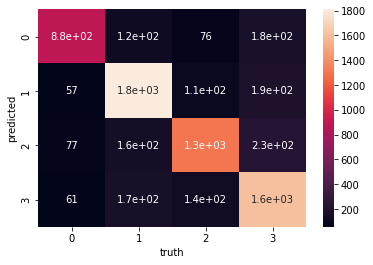

In [ ]:
sns.heatmap(cm , annot =True)
plt.xlabel('truth')
plt.ylabel('predicted')
plt.show()

#  RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=50)

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
model.score(x_train,y_train)

0.9733447046053652

In [ ]:
model.score(x_test,y_test)

0.9175272118336589

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test , y_predicted)

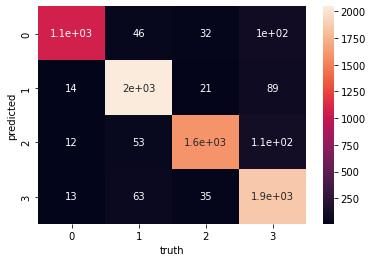

In [ ]:
sns.heatmap(cm , annot =True)
plt.xlabel('truth')
plt.ylabel('predicted')
plt.show()